In [1]:
import numpy as np
import math

import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
import src.rl_trading.environment
import src.rl_trading.agent

In [3]:
# Definición de parámetros relacionados al env:

s0 = 100
T = 1.  # Total time.
sigma = 2.  # Standard deviation.
dt = .005  # Time step.
beta = 0.5
kappa = beta * 2
k = 1.5
A = 137.45

In [4]:
# Simulación!
env = src.rl_trading.environment.AvellanedaEnv(s0, T, dt, sigma, beta, k, A, kappa, is_discrete=False)
agent_sym = src.rl_trading.agent.SymmetricAgent(beta, sigma, k)


obs = env.reset()

bids = np.zeros(env.n)
asks = np.zeros(env.n)
ss = np.zeros(env.n)
qs = np.zeros(env.n)
w = 0
final = False
i = 0

total_reward = 0.0

while not final:
    action_sym = agent_sym.step(obs)

    ds = action_sym
    spread = src.rl_trading.environment.spread(env.beta,env.sigma,env.T-env.t,env.k)

    ss[i] = obs[0]
    qs[i] = obs[1]

    bids[i] = ss[i] - ds - spread/2
    asks[i] = ss[i] - ds + spread/2

    obs, reward, final, w_sym = env.step(action_sym)
    i += 1
    total_reward += reward


C:\Users\Javier\anaconda3\envs\quant-clase-3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


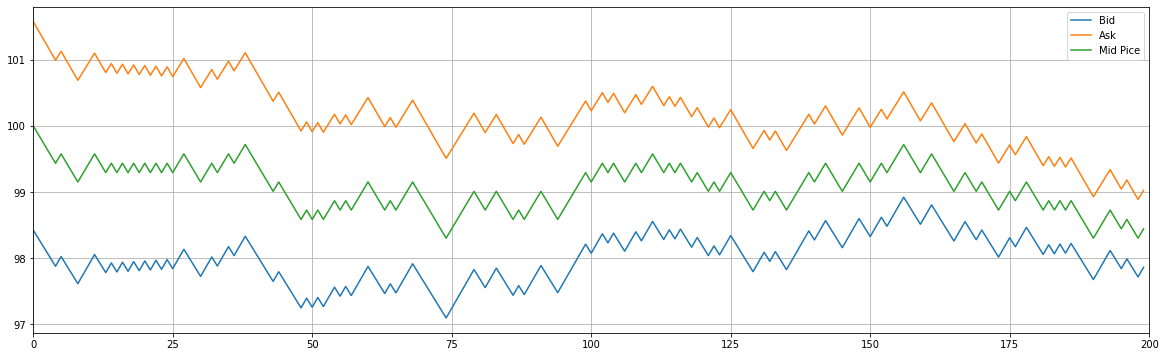

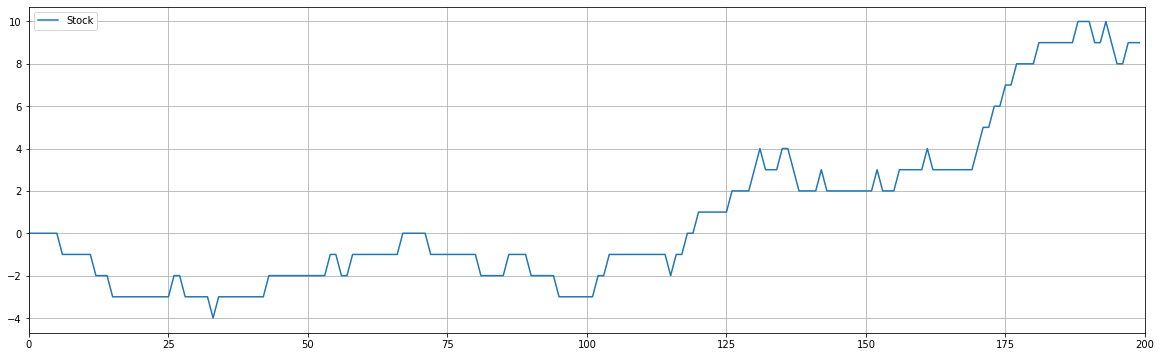

In [5]:
# Grafico de una realizacion...

# Precios
plt.figure(figsize=(20,6))
plt.xlim([0, env.n])
plt.grid()
plt.plot(bids, label="Bid")
plt.plot(asks, label="Ask")
plt.plot(ss, label="Mid Pice")
plt.legend()

# Stock
plt.figure(figsize=(20,6))
plt.xlim([0, env.n])
plt.grid()
plt.plot(qs, label="Stock")
plt.legend()



In [6]:
# Simulemos 1000 veces el environment...
number_of_sims = 1000

w = []
q = []

for sim_number in range(number_of_sims):
       
    obs = env.reset()

    bids = 0
    asks = 0
    ss = 0
    qs = 0
    final = False
    i = 0

    total_reward = 0.0

    while not final:
        action_sym = agent_sym.step(obs)

        ds = action_sym
        spread = src.rl_trading.environment.spread(env.beta,env.sigma,env.T-env.t,env.k)

        ss = obs[0]
        qs = obs[1]

        bids = ss - ds - spread/2
        asks = ss - ds + spread/2

        obs, reward, final, w_sym = env.step(action_sym)
        i += 1
        total_reward += reward
    
    w.append(w_sym['w'])
    q.append(qs)

Text(0.5, 1.0, 'Stock')

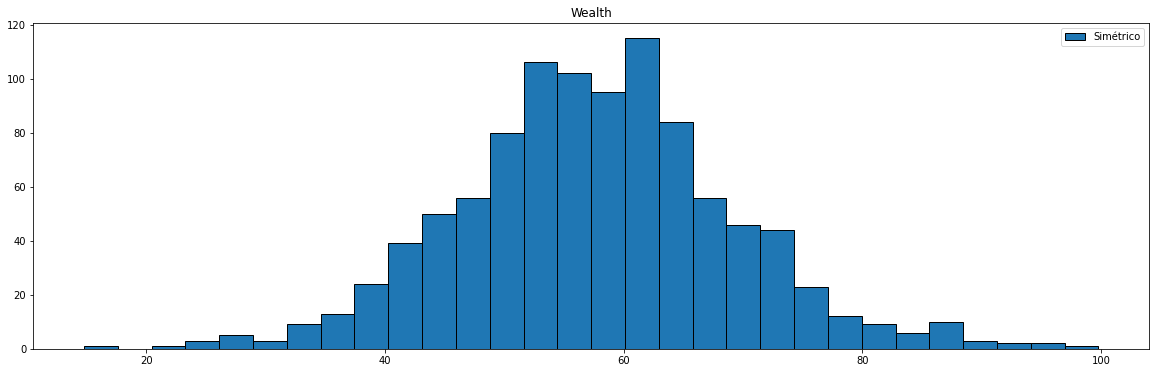

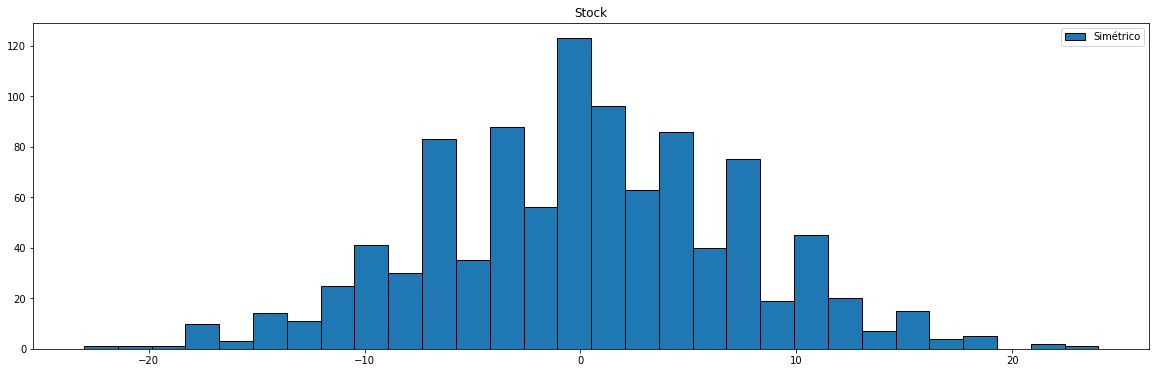

In [7]:
# Veamos la distribución de w y de q...
plt.figure(figsize=(20,6))
plt.hist(w,bins=30,edgecolor='black',label="Simétrico")
plt.legend()
plt.title("Wealth")

plt.figure(figsize=(20,6))
plt.hist(q,bins=30,edgecolor='black',label="Simétrico")
plt.legend()
plt.title("Stock")

In [8]:
# Ahora usemos el mismo env, solo que con el agente óptimo
# Simulación!
env = src.rl_trading.environment.AvellanedaEnv(s0, T, dt, sigma, beta, k, A, kappa, is_discrete=False)
agent_sym = src.rl_trading.agent.AvellanedaAgent(beta, sigma, k)


obs = env.reset()

bids = np.zeros(env.n)
asks = np.zeros(env.n)
ss = np.zeros(env.n)
qs = np.zeros(env.n)
w = 0
final = False
i = 0

total_reward = 0.0

while not final:
    action_sym = agent_sym.step(obs)

    ds = action_sym
    spread = src.rl_trading.environment.spread(env.beta,env.sigma,env.T-env.t,env.k)

    ss[i] = obs[0]
    qs[i] = obs[1]

    bids[i] = ss[i] - ds - spread/2
    asks[i] = ss[i] - ds + spread/2

    obs, reward, final, w_sym = env.step(action_sym)
    i += 1
    total_reward += reward



C:\Users\Javier\anaconda3\envs\quant-clase-3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


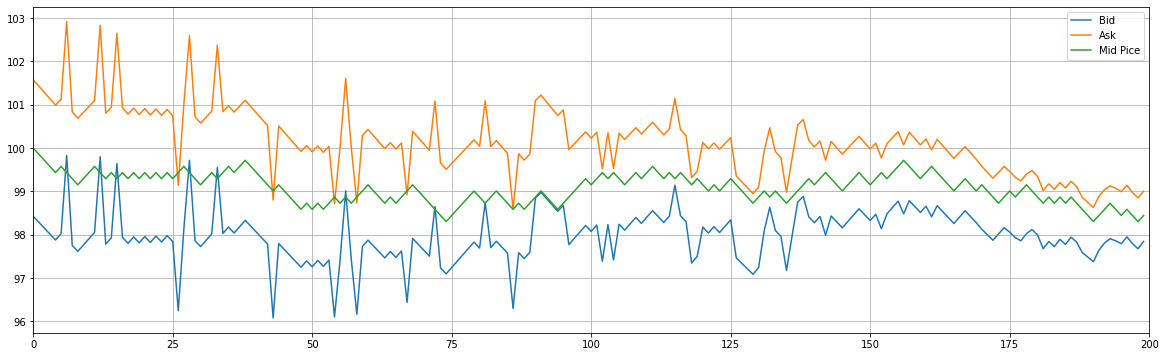

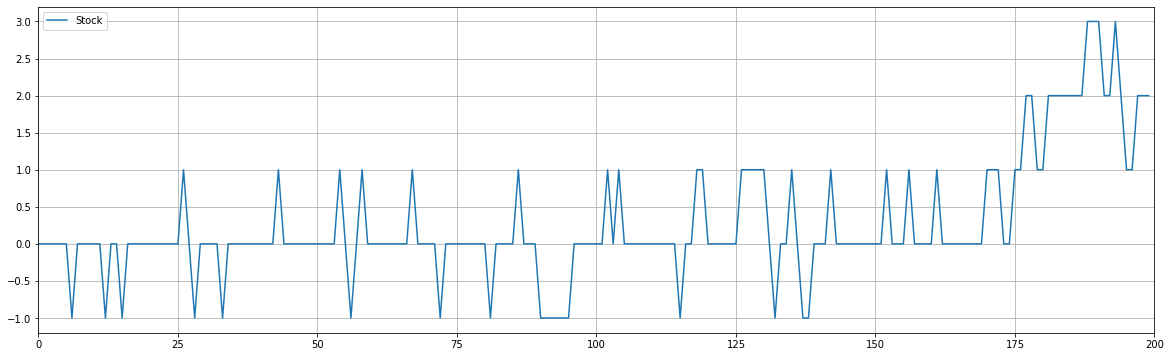

In [9]:
# Grafico de una realizacion...

# Precios
plt.figure(figsize=(20,6))
plt.xlim([0, env.n])
plt.grid()
plt.plot(bids, label="Bid")
plt.plot(asks, label="Ask")
plt.plot(ss, label="Mid Pice")
plt.legend()

# Stock
plt.figure(figsize=(20,6))
plt.xlim([0, env.n])
plt.grid()
plt.plot(qs, label="Stock")
plt.legend()



In [10]:
# Simulemos 1000 veces el environment...
number_of_sims = 1000

w = []
q = []

for sim_number in range(number_of_sims):
       
    obs = env.reset()

    bids = 0
    asks = 0
    ss = 0
    qs = 0
    final = False
    i = 0

    total_reward = 0.0

    while not final:
        action_sym = agent_sym.step(obs)

        ds = action_sym
        spread = src.rl_trading.environment.spread(env.beta,env.sigma,env.T-env.t,env.k)

        ss = obs[0]
        qs = obs[1]

        bids = ss - ds - spread/2
        asks = ss - ds + spread/2

        obs, reward, final, w_sym = env.step(action_sym)
        i += 1
        total_reward += reward
    
    w.append(w_sym['w'])
    q.append(qs)

Text(0.5, 1.0, 'Stock')

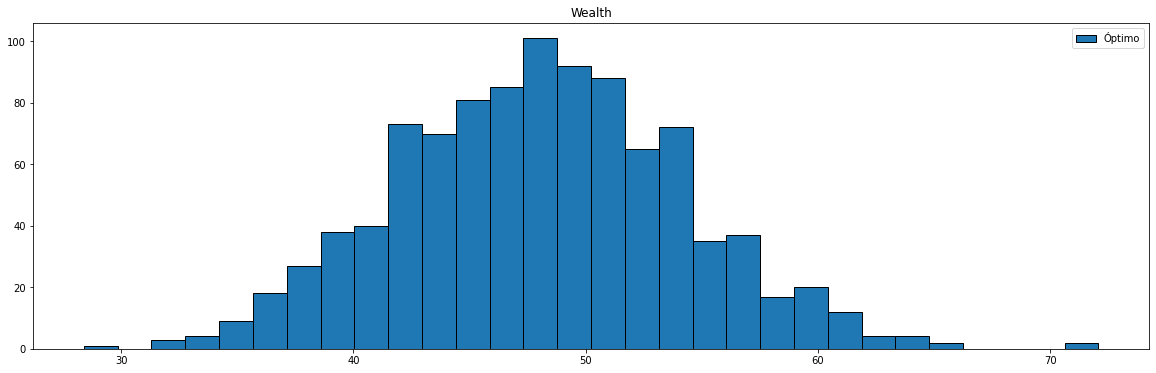

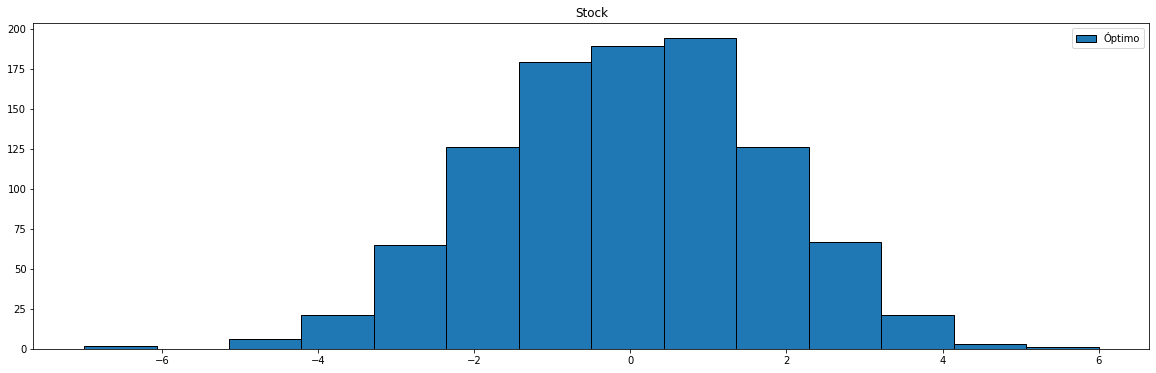

In [11]:
# Veamos la distribución de w y de q...
plt.figure(figsize=(20,6))
plt.hist(w,bins=30,edgecolor='black',label="Óptimo")
plt.legend()
plt.title("Wealth")

plt.figure(figsize=(20,6))
plt.hist(q,bins=14,edgecolor='black',label="Óptimo")
plt.legend()
plt.title("Stock")

In [12]:
def run_env_agent_comp(envs, agent_opt,agent_sym):

    env = envs[0]
    
    obs = env.reset()
    bids_opt = np.zeros(env.n)
    asks_opt = np.zeros(env.n)
    ds_opt = np.zeros(env.n)
    spread_opt = np.zeros(env.n)
    ss_opt = np.zeros(env.n)
    ws_opt = np.zeros(env.n)
    qs_opt = np.zeros(env.n)
    final = False
    i = 0

    total_reward_opt = 0.0
    while not final:
        action_opt = agent_opt.step(obs)

        ds_opt[i] = action_opt
        spread_opt[i] = src.rl_trading.environment.spread(env.beta,env.sigma,env.T-env.t,env.k)
        
        ss_opt[i] = obs[0]
        qs_opt[i] = obs[1]

        bids_opt[i] = ss_opt[i] - ds_opt[i] - spread_opt[i]/2
        asks_opt[i] = ss_opt[i] - ds_opt[i] + spread_opt[i]/2

        obs, reward, final, w_opt = env.step(action_opt)
        total_reward_opt += reward
        i += 1

    env = envs[1]

    obs = env.reset()
    bids_sym = np.zeros(env.n)
    asks_sym = np.zeros(env.n)
    ds_sym = np.zeros(env.n)
    spread_sym = np.zeros(env.n)
    ss_sym = np.zeros(env.n)
    ws_sym = np.zeros(env.n)
    qs_sym = np.zeros(env.n)    
    final = False
    i = 0

    total_reward_sym = 0.0
    while not final:
        action_sym = agent_sym.step(obs)

        ds_sym[i] = action_sym
        spread_sym[i] = src.rl_trading.environment.spread(env.beta,env.sigma,env.T-env.t,env.k)
        
        ss_sym[i] = obs[0]
        qs_sym[i] = obs[1]

        bids_sym[i] = ss_sym[i] - ds_sym[i] - spread_sym[i]/2
        asks_sym[i] = ss_sym[i] - ds_sym[i] + spread_sym[i]/2
        
        obs, reward, final, w_sym = env.step(action_sym)
        i += 1
        total_reward_sym += reward

        
    return w_opt['w'], w_sym['w'], qs_opt[-1], qs_sym[-1]

In [13]:
number_of_sims = 1000
n = int(T/dt)
ws_opt = np.zeros(number_of_sims)
ws_sym = np.zeros(number_of_sims)
q_opt = np.zeros(number_of_sims)
q_sym = np.zeros(number_of_sims)

envs = [
    src.rl_trading.environment.AvellanedaEnv(s0, T, dt, sigma, beta, k, A, kappa, seed=0, is_discrete=False),
    src.rl_trading.environment.AvellanedaEnv(s0, T, dt, sigma, beta, k, A, kappa, seed=0, is_discrete=False),
]

for i in range(number_of_sims):
    if i%10 == 0:
        print(str(i/10) + "%")
    ws_opt[i], ws_sym[i], q_opt[i], q_sym[i] = run_env_agent_comp(envs,
                                                                    src.rl_trading.agent.AvellanedaAgent(beta, sigma, k),
                                                                    src.rl_trading.agent.SymmetricAgent(beta, sigma, k)
                                                                   )


C:\Users\Javier\anaconda3\envs\quant-clase-3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


0.0%
1.0%
2.0%
3.0%
4.0%
5.0%
6.0%
7.0%
8.0%
9.0%
10.0%
11.0%
12.0%
13.0%
14.0%
15.0%
16.0%
17.0%
18.0%
19.0%
20.0%
21.0%
22.0%
23.0%
24.0%
25.0%
26.0%
27.0%
28.0%
29.0%
30.0%
31.0%
32.0%
33.0%
34.0%
35.0%
36.0%
37.0%
38.0%
39.0%
40.0%
41.0%
42.0%
43.0%
44.0%
45.0%
46.0%
47.0%
48.0%
49.0%
50.0%
51.0%
52.0%
53.0%
54.0%
55.0%
56.0%
57.0%
58.0%
59.0%
60.0%
61.0%
62.0%
63.0%
64.0%
65.0%
66.0%
67.0%
68.0%
69.0%
70.0%
71.0%
72.0%
73.0%
74.0%
75.0%
76.0%
77.0%
78.0%
79.0%
80.0%
81.0%
82.0%
83.0%
84.0%
85.0%
86.0%
87.0%
88.0%
89.0%
90.0%
91.0%
92.0%
93.0%
94.0%
95.0%
96.0%
97.0%
98.0%
99.0%


Text(0.5, 1.0, 'Accumulated wealth histogram')

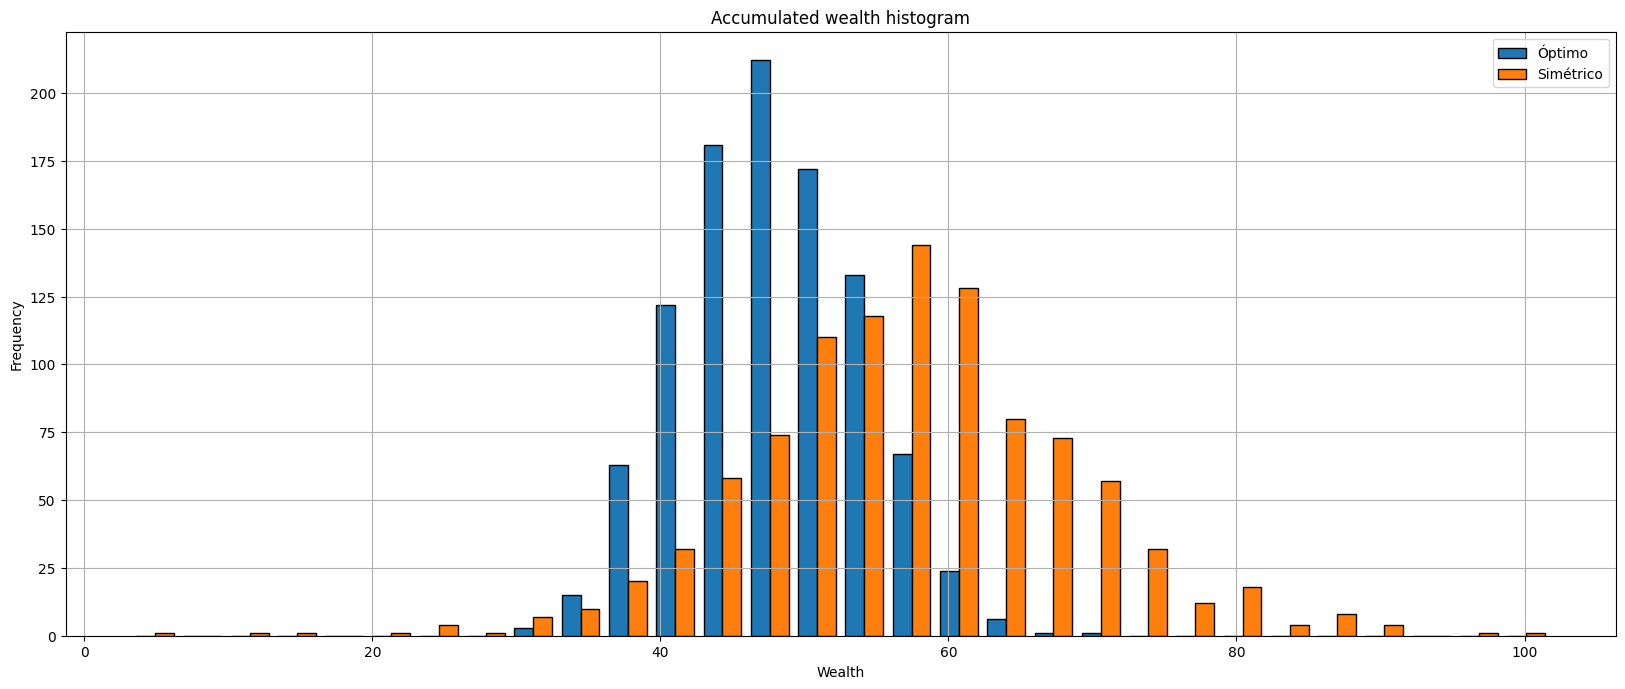

In [14]:
# Figure 2 (p. 222)
fig=plt.figure(figsize=(20,8), dpi= 100, facecolor='w', edgecolor='k')
plt.hist([ws_opt,ws_sym], bins=30,edgecolor='black', label=['Óptimo','Simétrico'])
plt.grid()
plt.legend()
plt.xlabel("Wealth")
plt.ylabel("Frequency")
plt.title("Accumulated wealth histogram")

Text(0.5, 1.0, 'Accumulated stock histogram')

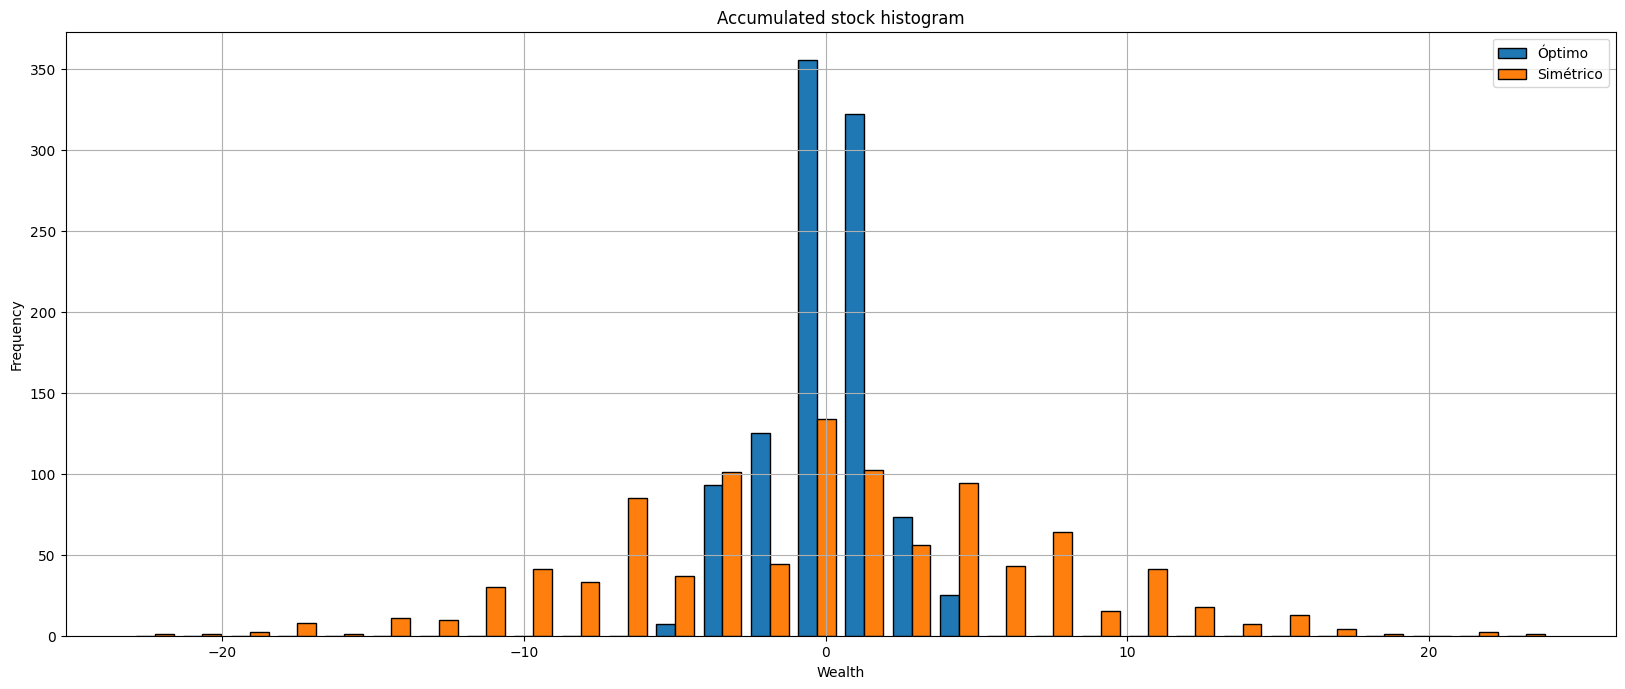

In [15]:
# Figure 2 (p. 222)
fig=plt.figure(figsize=(20,8), dpi= 100, facecolor='w', edgecolor='k')
plt.hist([q_opt,q_sym], bins=30,edgecolor='black', label=['Óptimo','Simétrico'])
plt.grid()
plt.legend()
plt.xlabel("Wealth")
plt.ylabel("Frequency")
plt.title("Accumulated stock histogram")

In [16]:
# Ahora probemos entrenar un agente de RL para ver si puede reproducir o mejorar el resultado!
from stable_baselines3 import PPO, DQN, A2C

policy_kwargs = dict(net_arch=[10,10])
model = DQN('MlpPolicy', env, policy_kwargs=policy_kwargs, verbose=1, gamma=1.0)
total_timesteps = 10000
model.learn(total_timesteps=total_timesteps)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 200       |
|    ep_rew_mean      | -3.29e+04 |
|    exploration rate | 0.24      |
| time/               |           |
|    episodes         | 4         |
|    fps              | 11702     |
|    time_elapsed     | 0         |
|    total timesteps  | 800       |
-----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 200      |
|    ep_rew_mean      | -3.1e+04 |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 11700    |
|    time_elapsed     | 0        |
|    total timesteps  | 1600     |
----------------------------------
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 200       |
|    ep_rew_mean 

In [17]:
# Cargamos el agente óptimo entrenado previamente...
from stable_baselines3 import PPO, DQN, A2C

# Load best model!
model = DQN.load("best_model.zip")

C:\Users\Javier\anaconda3\envs\quant-clase-3\lib\site-packages\stable_baselines3\common\save_util.py:166: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
  warnings.warn(
C:\Users\Javier\anaconda3\envs\quant-clase-3\lib\site-packages\stable_baselines3\common\save_util.py:166: UserWarning: Could not deserialize object exploration_schedule. Consider using `custom_objects` argument to replace this object.
  warnings.warn(


In [18]:
def run_env_agent_comp(envs, agent_rl,agent_opt,agent_sym):
    
    env = envs[0]
    
    obs = env.reset()
    bids_rl = np.zeros(env.n)
    asks_rl = np.zeros(env.n)
    ss_rl = np.zeros(env.n)
    ws_rl = np.zeros(env.n)
    qs_rl = np.zeros(env.n)
    final = False
    i = 0

    total_reward_rl = 0.0
    while not final:

        action_rl = agent_rl.predict(obs,deterministic=True)
        ss_rl[i] = obs[0]
        qs_rl[i] = obs[1]
        
        despl = (action_rl[0]-(src.rl_trading.environment.actions_num-1)/2)*src.rl_trading.environment.max_abs_dif/(src.rl_trading.environment.actions_num-1)
        ba_spread = src.rl_trading.environment.spread(env.beta,env.sigma,env.T-env.t,env.k)

        bids_rl[i] = ss_rl[i] - despl - ba_spread/2
        asks_rl[i] = ss_rl[i] - despl + ba_spread/2

        obs, reward, final, w_rl = env.step(action_rl[0])
        i += 1
        total_reward_rl += reward

      
    

    env = envs[1]
    
    obs = env.reset()
    bids_opt = np.zeros(env.n)
    asks_opt = np.zeros(env.n)
    ds_opt = np.zeros(env.n)
    spread_opt = np.zeros(env.n)
    ss_opt = np.zeros(env.n)
    ws_opt = np.zeros(env.n)
    qs_opt = np.zeros(env.n)
    final = False
    i = 0

    total_reward_opt = 0.0
    while not final:
        action_opt = agent_opt.step(obs)

        ds_opt[i] = action_opt
        spread_opt[i] = src.rl_trading.environment.spread(env.beta,env.sigma,env.T-env.t,env.k)
        
        ss_opt[i] = obs[0]
        qs_opt[i] = obs[1]

        bids_opt[i] = ss_opt[i] - ds_opt[i] - spread_opt[i]/2
        asks_opt[i] = ss_opt[i] - ds_opt[i] + spread_opt[i]/2

        obs, reward, final, w_opt = env.step(action_opt)
        total_reward_opt += reward
        i += 1

    env = envs[2]

    obs = env.reset()
    bids_sym = np.zeros(env.n)
    asks_sym = np.zeros(env.n)
    ds_sym = np.zeros(env.n)
    spread_sym = np.zeros(env.n)
    ss_sym = np.zeros(env.n)
    ws_sym = np.zeros(env.n)
    qs_sym = np.zeros(env.n)    
    final = False
    i = 0

    total_reward_sym = 0.0
    while not final:
        action_sym = agent_sym.step(obs)

        ds_sym[i] = action_sym
        spread_sym[i] = src.rl_trading.environment.spread(env.beta,env.sigma,env.T-env.t,env.k)
        
        ss_sym[i] = obs[0]
        qs_sym[i] = obs[1]

        bids_sym[i] = ss_sym[i] - ds_sym[i] - spread_sym[i]/2
        asks_sym[i] = ss_sym[i] - ds_sym[i] + spread_sym[i]/2
        
        obs, reward, final, w_sym = env.step(action_sym)
        i += 1
        total_reward_sym += reward

        
    return w_rl['w'], w_opt['w'], w_sym['w'],total_reward_rl,total_reward_opt,total_reward_sym

In [19]:
number_of_sims = 1000

n = int(T/dt)

ws_rl = np.zeros(number_of_sims)
ws_opt = np.zeros(number_of_sims)
ws_sym = np.zeros(number_of_sims)
tr_rl = np.zeros(number_of_sims)
tr_opt = np.zeros(number_of_sims)
tr_sym = np.zeros(number_of_sims)

envs = [
    src.rl_trading.environment.AvellanedaEnv(s0, T, dt, sigma, beta, k, A, kappa, seed=0),
    src.rl_trading.environment.AvellanedaEnv(s0, T, dt, sigma, beta, k, A, kappa, seed=0, is_discrete=False),
    src.rl_trading.environment.AvellanedaEnv(s0, T, dt, sigma, beta, k, A, kappa, seed=0, is_discrete=False),
]

for i in range(number_of_sims):
    if i%10 == 0:
        print(str(i * 10 / number_of_sims) + "%")
    ws_rl[i], ws_opt[i], ws_sym[i], tr_rl[i], tr_opt[i], tr_sym[i] = run_env_agent_comp(envs,
                                                                                        model,
                                                                                        src.rl_trading.agent.AvellanedaAgent(beta, sigma, k),
                                                                                        src.rl_trading.agent.SymmetricAgent(beta, sigma, k))

C:\Users\Javier\anaconda3\envs\quant-clase-3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


0.0%
0.1%
0.2%
0.3%
0.4%
0.5%
0.6%
0.7%
0.8%
0.9%
1.0%
1.1%
1.2%
1.3%
1.4%
1.5%
1.6%
1.7%
1.8%
1.9%
2.0%
2.1%
2.2%
2.3%
2.4%
2.5%
2.6%
2.7%
2.8%
2.9%
3.0%
3.1%
3.2%
3.3%
3.4%
3.5%
3.6%
3.7%
3.8%
3.9%
4.0%
4.1%
4.2%
4.3%
4.4%
4.5%
4.6%
4.7%
4.8%
4.9%
5.0%
5.1%
5.2%
5.3%
5.4%
5.5%
5.6%
5.7%
5.8%
5.9%
6.0%
6.1%
6.2%
6.3%
6.4%
6.5%
6.6%
6.7%
6.8%
6.9%
7.0%
7.1%
7.2%
7.3%
7.4%
7.5%
7.6%
7.7%
7.8%
7.9%
8.0%
8.1%
8.2%
8.3%
8.4%
8.5%
8.6%
8.7%
8.8%
8.9%
9.0%
9.1%
9.2%
9.3%
9.4%
9.5%
9.6%
9.7%
9.8%
9.9%


Text(0, 0.5, 'Frequency')

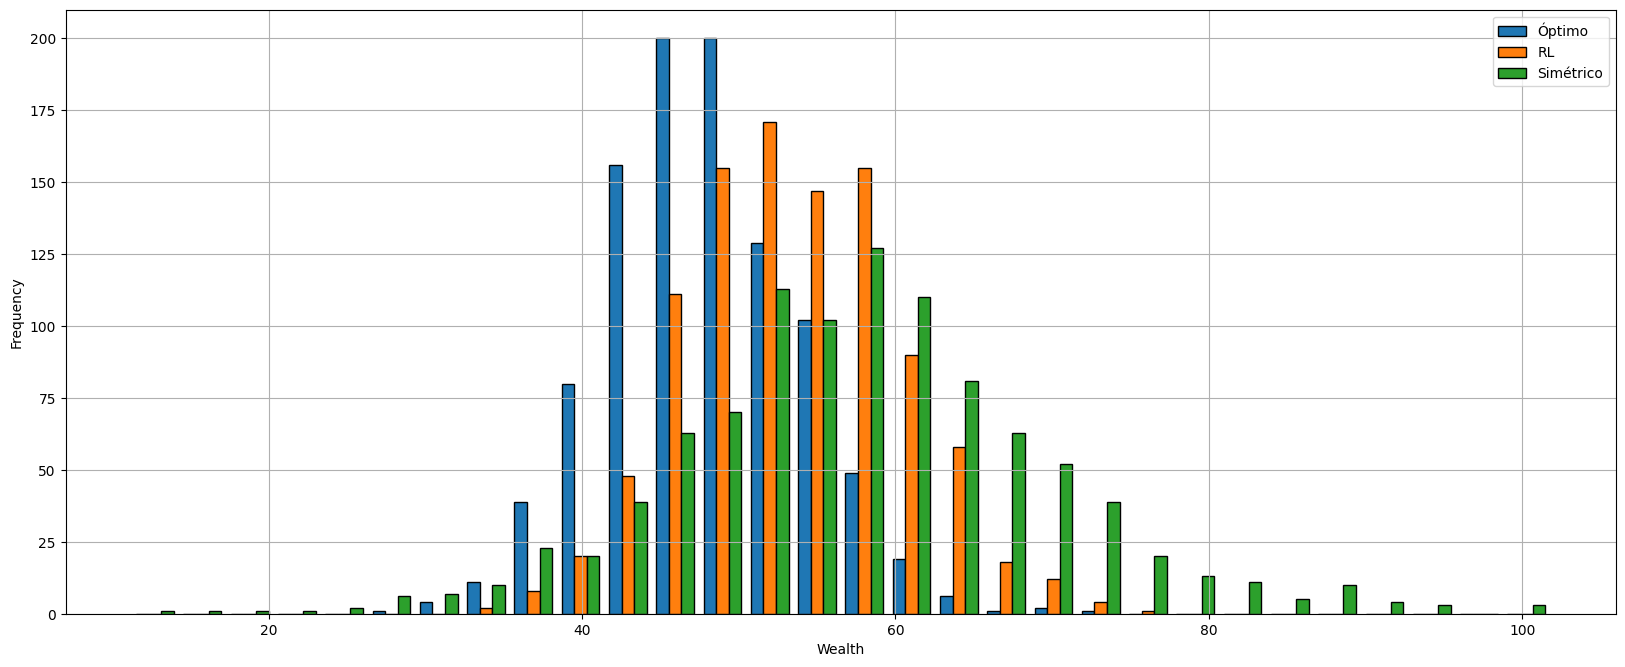

In [28]:
# Figure 2 (p. 222)
fig=plt.figure(figsize=(20,8), dpi= 100, facecolor='w', edgecolor='k')
plt.hist([ws_opt,ws_rl,ws_sym], bins=30,edgecolor='black', label=['Óptimo','RL', "Simétrico"])
plt.grid()
plt.legend()
plt.xlabel("Wealth")
plt.ylabel("Frequency")
#plt.title("Accumulated wealth histogram")

Text(0, 0.5, 'Frequency')

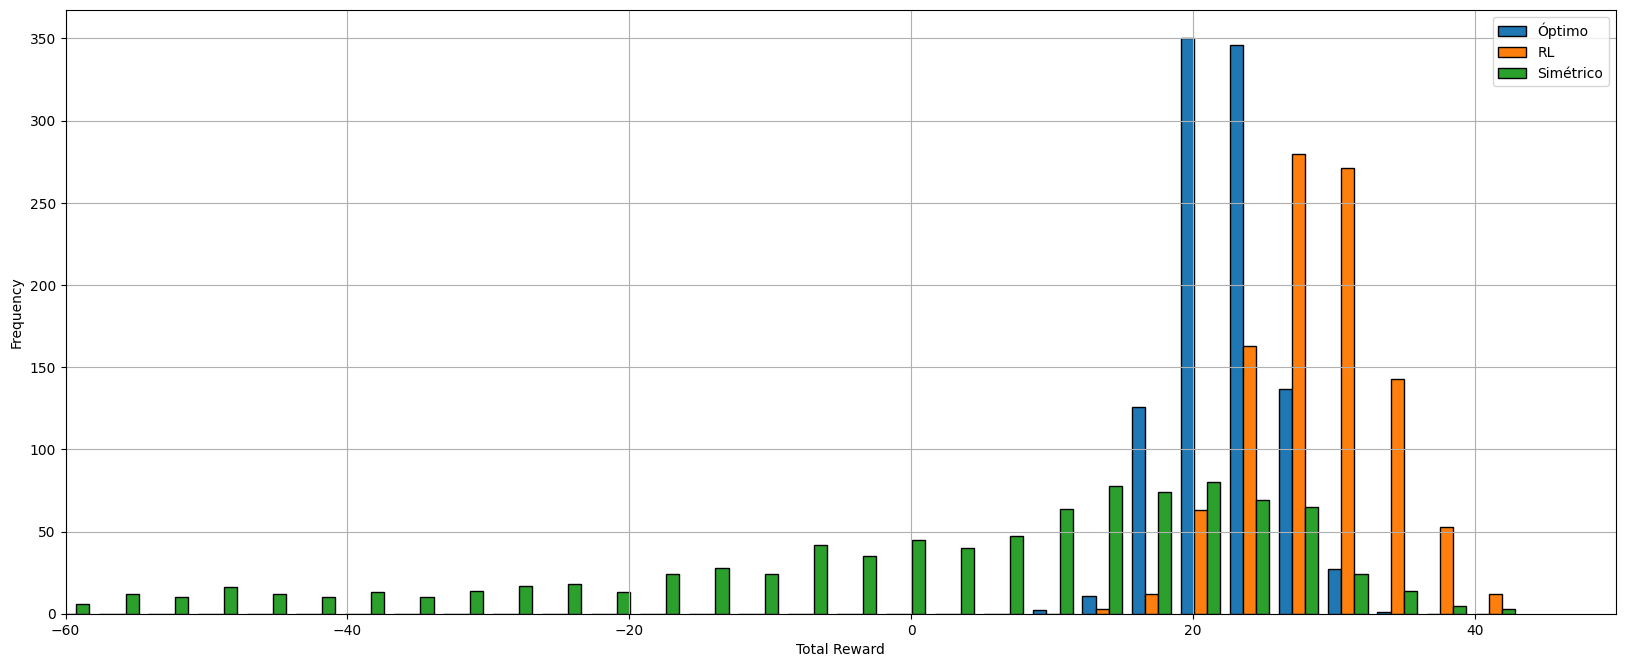

In [27]:
fig=plt.figure(figsize=(20,8), dpi= 100, facecolor='w', edgecolor='k')
plt.hist([tr_opt,tr_rl,tr_sym], bins=100,edgecolor='black', label=['Óptimo','RL', "Simétrico"])
plt.grid()
plt.legend()
plt.xlim([-60,50])
plt.xlabel("Total Reward")
plt.ylabel("Frequency")
#plt.title("Accumulated wealth histogram")

In [ ]:
print("Optimo:")
print(np.mean(ws_opt))
print(np.std(ws_opt))
print(np.mean(ws_opt)/np.std(ws_opt))
print("Simetrico:")
print(np.mean(ws_sym))
print(np.std(ws_sym))
print(np.mean(ws_sym)/np.std(ws_sym))
print("RL:")
print(np.mean(ws_rl))
print(np.std(ws_rl))
print(np.mean(ws_rl)/np.std(ws_rl))

print()

utility_avellaneda = np.mean(-np.exp(-beta*ws_opt))
utility_rl = np.mean(-np.exp(-beta*ws_rl))

print("Optimum utility function value: \t{}".format(utility_avellaneda))
print("Symmetric utility function value: \t{}".format(np.mean(-np.exp(-beta*ws_sym))))
print("RL utility function value: \t\t{}".format(utility_rl))